In [88]:
import math
import numpy
from matplotlib import pyplot
%matplotlib inline

data1=r"AeroPython/lessons/resources/NACA0012_sigma.txt"
data2=r"AeroPython/lessons/resources/NACA0012_x.txt"
data3=r"C:\Users\DYLiang\Desktop\NACA0012_y.txt"

In [89]:
sigma=numpy.loadtxt(fname='NACA0012_sigma.txt')
x=numpy.loadtxt(fname='NACA0012_x.txt')
y=numpy.loadtxt(fname='NACA0012_y.txt')

In [90]:
print(sigma)

[ -1.95309991e-03   2.60482642e-05  -5.81518645e-04  -8.89536827e-04
  -1.15941798e-03  -1.41993763e-03  -1.66876709e-03  -1.90115599e-03
  -2.12520803e-03  -2.33460339e-03  -2.50907105e-03  -2.68095130e-03
  -2.83396339e-03  -2.95012605e-03  -3.05260798e-03  -3.14320214e-03
  -3.20137935e-03  -3.22263310e-03  -3.24527034e-03  -3.24490824e-03
  -3.16714411e-03  -3.11074675e-03  -3.02654868e-03  -2.86501125e-03
  -2.68959853e-03  -2.50600566e-03  -2.25656512e-03  -1.93206429e-03
  -1.63993193e-03  -1.31763961e-03  -8.24295623e-04  -4.34768019e-04
  -2.54618699e-05   5.18104379e-04   1.02392530e-03   1.47371145e-03
   1.98848865e-03   2.57525999e-03   3.00354582e-03   3.39761336e-03
   4.03754582e-03   4.39301493e-03   4.69214354e-03   5.19526794e-03
   5.58462337e-03   5.79826033e-03   6.15394907e-03   6.84337964e-03
   7.13740771e-03   6.82483070e-03   6.82483070e-03   7.13740771e-03
   6.84337964e-03   6.15394907e-03   5.79826033e-03   5.58462337e-03
   5.19526794e-03   4.69214354e-03

In [75]:
print(x)

[  9.99506682e-01   9.97535357e-01   9.93600488e-01   9.87717603e-01
   9.79909919e-01   9.70208251e-01   9.58650885e-01   9.45283433e-01
   9.30158651e-01   9.13336230e-01   8.94882559e-01   8.74870468e-01
   8.53378933e-01   8.30492774e-01   8.06302311e-01   7.80903012e-01
   7.54395117e-01   7.26883241e-01   6.98475961e-01   6.69285387e-01
   6.39426720e-01   6.09017800e-01   5.78178637e-01   5.47030938e-01
   5.15697630e-01   4.84302370e-01   4.52969062e-01   4.21821363e-01
   3.90982200e-01   3.60573280e-01   3.30714613e-01   3.01524039e-01
   2.73116759e-01   2.45604883e-01   2.19096988e-01   1.93697689e-01
   1.69507226e-01   1.46621067e-01   1.25129532e-01   1.05117441e-01
   8.66637700e-02   6.98413486e-02   5.47165669e-02   4.13491154e-02
   2.97917495e-02   2.00900806e-02   1.22823970e-02   6.39951199e-03
   2.46464256e-03   4.93317893e-04   4.93317893e-04   2.46464256e-03
   6.39951199e-03   1.22823970e-02   2.00900806e-02   2.97917495e-02
   4.13491154e-02   5.47165669e-02

In [76]:
#n=numpy.unravel_index(sigma, )
#m=numpy.argmax()

In [138]:
N = 100                               
x_start, x_end = -1.0, 2.0            
y_start, y_end = -0.5, 0.5            
x1 = numpy.linspace(x_start, x_end, N)    
y1 = numpy.linspace(y_start, y_end, N)    
X, Y = numpy.meshgrid(x1, y1) 

In [149]:
kappa = sigma     #how to calculate this？？？？？？？？？？？？？？？？？？？           
x_air= x   
y_air= y

In [150]:
def get_velocity_air(strength, xd, yd, X, Y):
    u = - strength/(2*math.pi)*((X-xd)**2-(Y-yd)**2)/((X-xd)**2+(Y-yd)**2)**2
    v = - strength/(2*math.pi)*2*(X-xd)*(Y-yd)/((X-xd)**2+(Y-yd)**2)**2
    
    return u, v
def get_stream_function_air(strength, xd, yd, X, Y):
    psi = - strength/(2*math.pi)*(Y-yd)/((X-xd)**2+(Y-yd)**2)
    
    return psi

In [151]:
u_air, v_air = get_velocity_air(kappa, x_air, y_air, X, Y)

psi_air = get_stream_function_air(kappa, x_air, y_air, X, Y)

In [152]:
u_inf = 1.0 

In [153]:
u_freestream = u_inf * numpy.ones((N, N), dtype=float)
v_freestream = numpy.zeros((N, N), dtype=float)

psi_freestream = u_inf * Y

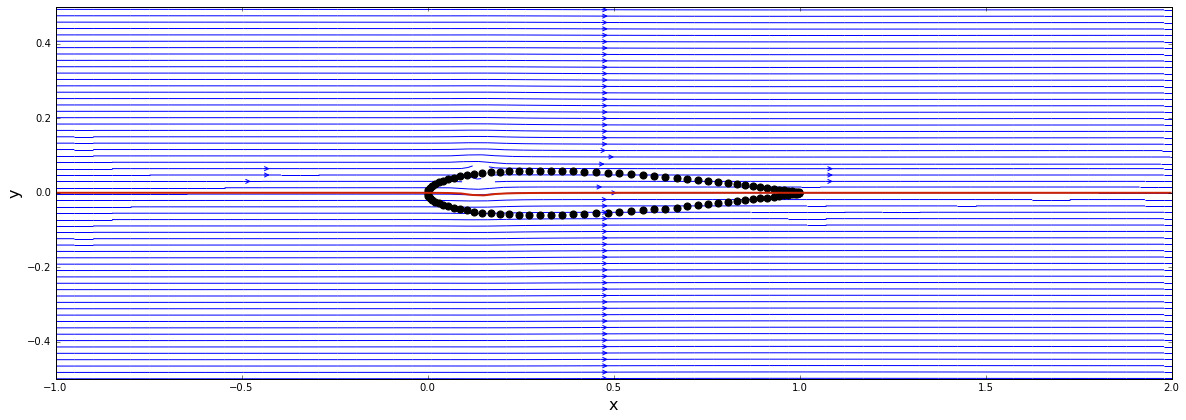

In [154]:
u = u_freestream + u_air
v = v_freestream + v_air
psi = psi_freestream + psi_air

size = 20
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.contour(X, Y, psi, levels=[0.], colors='#CD2305', linewidths=2, linestyles='solid')
pyplot.scatter(x_air, y_air, color='black', s=50, marker='o')

#x_stagn1, y_stagn1 = +math.sqrt(kappa/(2*math.pi*u_inf)), 0
#x_stagn2, y_stagn2 = -math.sqrt(kappa/(2*math.pi*u_inf)), 0

# display the stagnation points
#pyplot.scatter([x_stagn1, x_stagn2], [y_stagn1, y_stagn2], color='g', s=80, marker='o');

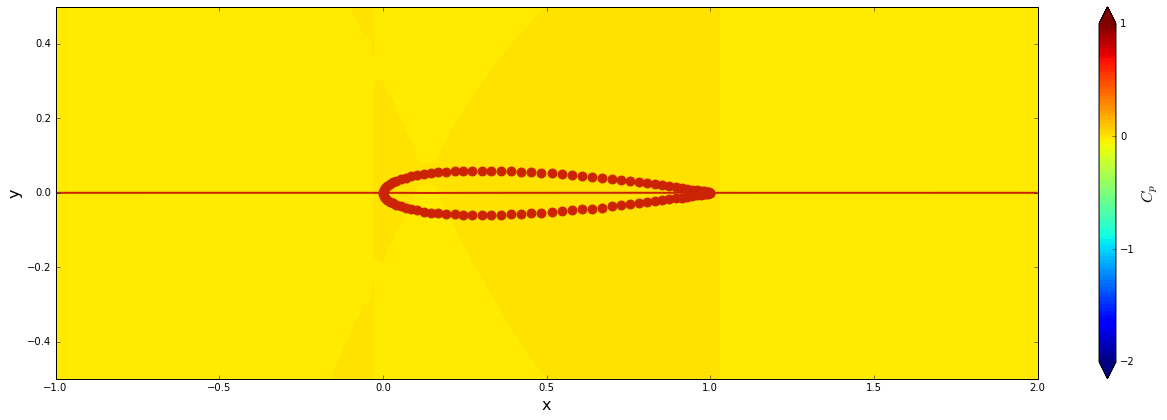

In [145]:
cp = 1.0 - (u**2+v**2)/u_inf**2

size = 20
pyplot.figure(figsize=(1.1*size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
contf = pyplot.contourf(X, Y, cp, levels=numpy.linspace(-2.0, 1.0, 100), extend='both')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)
cbar.set_ticks([-2.0, -1.0, 0.0, 1.0])
pyplot.scatter(x_doublet, y_doublet, color='#CD2305', s=80, marker='o')
pyplot.contour(X,Y,psi, levels=[0.], colors='#CD2305', linewidths=2, linestyles='solid')
#pyplot.scatter([x_stagn1, x_stagn2], [y_stagn1, y_stagn2], color='g', s=80, marker='o');